##ภานุพงศ์ สนไชย 6610210301

In [ ]:
from itertools import product
import imageio
import numpy as np
import matplotlib; matplotlib.use('agg')
import matplotlib.pyplot as plt


def renderCube(f=0,
               t=np.array([0, 0, 0]),
               R=np.eye(3),
               file_name=None):
    # Render the cube
    L = generateCube()
    t = np.array(t)
    pL = projectLines(f, R, t, L)

    # Generate plot
    fig = plt.figure()
    plt.title("Cube @ [x=%.1f y=%.1f z=%.1f] f=%f" % (t[0], t[1], t[2], f))
    for i in range(pL.shape[0]):
        u1, v1, u2, v2 = pL[i, :]
        plt.plot((u1, u2), (v1, v2), linewidth=2)

    # Format plot
    plt.axis('square')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    # Save to file if filename is provided
    if file_name:
        plt.savefig(file_name)

    return fig


def generateCube():
    lines = []
    for x, y, z in product([0, 1], [0, 1], [0, 1]):
        # all corners, check changing all the dirensions
        # if in the cube, keep, but then center at 0
        for dx, dy, dz in [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0),
                           (0, 0, 1), (0, 0, -1)]:
            xp, yp, zp = x + dx, y + dy, z + dz
            if min([xp, yp, zp]) >= 0 and max([xp, yp, zp]) <= 1:
                lines.append(
                    (x - 0.5, y - 0.5, z - 0.5, xp - 0.5, yp - 0.5, zp - 0.5))
    return np.vstack(lines)


def xyrange(pL):
    # Returns the X and Y ranges for a line
    X, Y = np.vstack([pL[:, 0], pL[:, 2]]), np.vstack([pL[:, 1], pL[:, 3]])
    return np.max(X) - np.min(X), np.max(Y) - np.min(Y)


def projectLines(f, R, t, L):
    pL = np.zeros((L.shape[0], 4))
    for i in range(L.shape[0]):
        # rotate and translate
        p = np.dot(R, L[i, :3]) + t
        pp = np.dot(R, L[i, 3:]) + t
        # apply projection u = x*f/z; v = y*f/z
        pL[i, :2] = p[0] * f / p[2], p[1] * f / p[2] #มันคือสมการข้างบนเหมือนชีทที่แล้ว แต่ implement ในรูปสมการอันที่แล้วทำในรูป matrix
        pL[i, 2:] = pp[0] * f / pp[2], pp[1] * f / pp[2]

    return np.vstack(pL)

def rotX(theta):
    rad_theta = np.radians(theta)
    ct = np.cos(rad_theta)
    st = np.sin(rad_theta)
    Rx = np.array(((1, 0, 0), (0, ct, st), (0, -st, ct)))
    return Rx


def rotY(theta):
    rad_theta = np.radians(theta)
    ct = np.cos(rad_theta)
    st = np.sin(rad_theta)
    Ry = np.array(((ct, 0, -st), (0, 1, 0), (st, 0, ct)))
    return Ry


def rotZ(theta):
    rad_theta = np.radians(theta)
    ct = np.cos(rad_theta)
    st = np.sin(rad_theta)
    Rz = np.array(((ct, st, 0), (-st, ct, 0), (0, 0, 1)))
    return Rz

## Question 1


In [98]:
R1 = rotZ(45) @ rotY(45) @ rotX(45)
t1 = np.array([0.5, 0.7, -4]).reshape(3,1)
f1 = 10
K1 = np.array([[f1, 0, 0],
              [0, f1, 0],
              [0, 0, 1]])
Rt = np.hstack((R1, t1))
P = K1 @ Rt
np.set_printoptions(precision=2, suppress=True)
print(f"P = \n{P}")

P = 
[[ 5.    8.54  1.46  5.  ]
 [-5.    1.46  8.54  7.  ]
 [ 0.71 -0.5   0.5  -4.  ]]


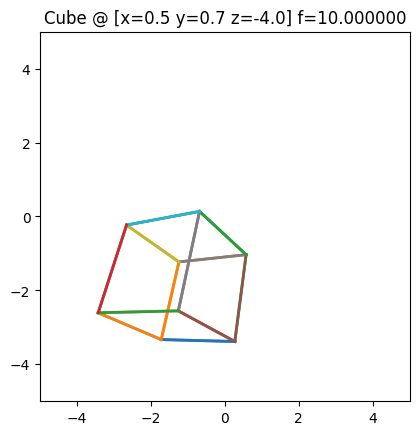

In [99]:
__=renderCube(f=f1, R=R1, t=np.array([0.5, 0.7, -4]))
__

## Question 2

In [100]:
R2 = rotX(-35)@rotY(45)
t2 = np.array([0, 0, 2])
f2 = 10
print(f"R = \n{R2}")
_ = renderCube(f=f2, R=R2, t=t2.flatten())

R = 
[[ 0.71  0.   -0.71]
 [-0.41  0.82 -0.41]
 [ 0.58  0.57  0.58]]


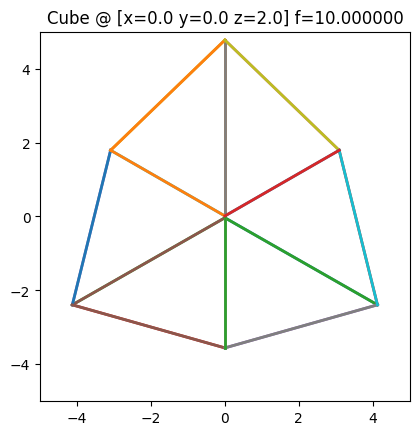

In [101]:
_

## Question 3

In [105]:
R3 = np.eye(3)
t3 = np.array([0, 0, -5]).flatten()
f3 = 50
print(f"f = \n{f3}")
_ = renderCube(f3, R=R3, t=t3)

f = 
50


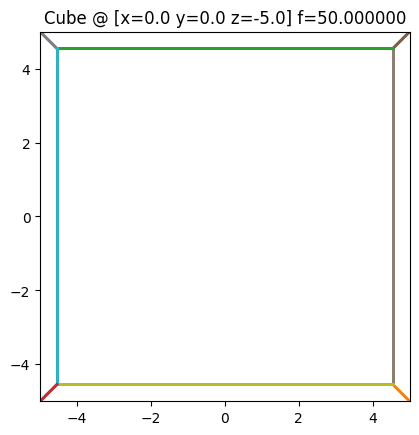

In [106]:
_